# Guido, Roma Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [2]:
guido_df = pd.read_csv('Resources/guido_roma_data.csv', delimiter=", ")
guido_df.head()

/Users/kathrynrigsby/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,date,pm25,pm10,o3,no2,so2,co
0,2020/7/2,38.0,22.0,16.0,3.0,",",NaN
1,2020/7/3,38.0,19.0,19.0,1.0,",",NaN
2,2020/7/4,42.0,19.0,22.0,2.0,",",NaN
3,2020/7/5,34.0,13.0,30.0,1.0,"1,",NaN
4,2020/7/6,30.0,15.0,33.0,1.0,",",NaN


## Dropping columns we are not using

In [3]:
dropped_guido_df = guido_df.drop(["pm10","o3","no2","so2","co"],axis=1)
dropped_guido_df.head()

,date,pm25
0,2020/7/2,38.0
1,2020/7/3,38.0
2,2020/7/4,42.0
3,2020/7/5,34.0
4,2020/7/6,30.0


## Changing datatype from objec to datetime

In [4]:
dropped_guido_df["date"] = pd.to_datetime(dropped_guido_df["date"])

## Dropping any data before 2018

In [5]:
droppedB4_18 = dropped_guido_df.loc[(dropped_guido_df["date"]>"2018-01-01")].dropna(how="any")

## 2018 Data

In [6]:
guido_data_18 = droppedB4_18.loc[(droppedB4_18["date"]<"2018-07-25")].dropna(how='any')

In [7]:
AQI2018 = []
for value in guido_data_18["pm25"]:
    if value >= 0 and value <= 12:
        AQI2018.append((((50-0)/(12-0))*(value-0))+ 0)
    elif value >=12.1 and value <= 35.4:
        AQI2018.append((((100-51)/(35.4-12.1))*(value-12.1))+51)
    elif value >= 35.5 and value <= 55.4:
        AQI2018.append((((150-101)/(55.4-35.5))*(value-35.5))+101)
    elif value >= 55.5 and value<= 150.4:
        AQI2018.append((((200-151)/(150.4-55.4))*(value-55.5))+151)
    elif value >= 150.5 and value <=250.4:
        AQI2018.append((((300-201)/(250.4-150.5))*(value-150.5))+201)
    elif value >= 250.5 and value <= 350.4:
        AQI2018.append((((400-301)/(350.4-250.5))*(value-250.5))+ 301)
    elif value >= 350.5 and value <= 500.4:
        AQI2018.append((((500-401)/(500.4-350.5))*(value-350.5))+ 401)
    else:
        AQI2018.append("invalid")
AQI2018 = [round(i,1) for i in AQI2018]

guido_data_18["AQI"] = AQI2018
guido_data_18.head()

,date,pm25,AQI
627,2018-07-02,46.0,126.9
628,2018-07-03,46.0,126.9
629,2018-07-04,55.0,149.0
630,2018-07-05,63.0,154.9
631,2018-07-06,72.0,159.5


In [8]:
bins = [0,50,100,150,200,300,500]
quality = ["Good","Moderate","Unhealthy for Sensitive Groups","Unhealthy","Very Unhealthy","Hazardous"]

In [9]:
guido_data_18["Levels of Concern"] = pd.cut(guido_data_18["AQI"],bins,labels=quality,include_lowest=True)
guido_data_18

,date,pm25,AQI,Levels of Concern
627,2018-07-02,46.0,126.9,Unhealthy for Sensitive Groups
628,2018-07-03,46.0,126.9,Unhealthy for Sensitive Groups
629,2018-07-04,55.0,149.0,Unhealthy for Sensitive Groups
630,2018-07-05,63.0,154.9,Unhealthy
631,2018-07-06,72.0,159.5,Unhealthy
...,...,...,...,...
893,2018-03-28,68.0,157.4,Unhealthy
894,2018-03-29,46.0,126.9,Unhealthy for Sensitive Groups
895,2018-03-30,21.0,69.7,Moderate
896,2018-03-31,30.0,88.6,Moderate


In [10]:
guido_data_18.sort_values(by=["date"]).to_csv("output_data/guido_data_18.csv")

In [11]:
calculate_18 = guido_data_18.groupby(guido_data_18["date"].dt.strftime('%m'))
mean_df =calculate_18[["pm25","AQI"]].mean().reset_index(drop=False,inplace=False)
max_df = calculate_18[["pm25","AQI"]].max()
min_df = calculate_18[["pm25","AQI"]].min()

In [12]:
result = pd.merge(mean_df,max_df, how='outer', on=['date'],suffixes=("_avg","_max"))

In [13]:
result2 = pd.merge(result,min_df, how='outer',on=['date'])

In [14]:
guido_2018_month_df = result2.rename(columns={
                                    
                                    "date":"Month",
                                    "pm25_avg":"Avg pm2.5",
                                    "AQI_avg":"Avg AQI",
                                    "pm25_max":"Max pm2.5",
                                    "AQI_max":"Max AQI",
                                    "pm25":"Min pm2.5",
                                    "AQI":"Min AQI"
 })
guido_2018_month_df

,Month,Avg pm2.5,Avg AQI,Max pm2.5,Max AQI,Min pm2.5,Min AQI
0,01,47.800000,120.500000,87.0,167.2,17.0,61.3
1,02,45.250000,118.864286,87.0,167.2,25.0,78.1
2,03,35.451613,100.219355,72.0,159.5,13.0,52.9
3,04,45.866667,124.256667,72.0,159.5,21.0,69.7
4,05,38.290323,107.000000,76.0,161.6,17.0,61.3
5,06,38.357143,108.360714,53.0,144.1,25.0,78.1
6,07,49.333333,131.733333,72.0,159.5,34.0,97.1


## 2019 Data

In [15]:
guido_data_19 = droppedB4_18.loc[(droppedB4_18["date"]>"2018-12-31")&(droppedB4_18["date"]<"2019-07-25")].dropna(how='any')

In [16]:
guido_data_19["AQI"]=""

In [17]:
AQI2019 = []
for value in guido_data_19["pm25"]:
    if value >= 0 and value <= 12:
        AQI2019.append((((50-0)/(12-0))*(value-0))+ 0)
    elif value >=12.1 and value <= 35.4:
        AQI2019.append((((100-51)/(35.4-12.1))*(value-12.1))+51)
    elif value >= 35.5 and value <= 55.4:
        AQI2019.append((((150-101)/(55.4-35.5))*(value-35.5))+101)
    elif value >= 55.5 and value<= 150.4:
        AQI2019.append((((200-151)/(150.4-55.4))*(value-55.5))+151)
    elif value >= 150.5 and value <=250.4:
        AQI2019.append((((300-201)/(250.4-150.5))*(value-150.5))+201)
    elif value >= 250.5 and value <= 350.4:
        AQI2019.append((((400-301)/(350.4-250.5))*(value-250.5))+ 301)
    elif value >= 350.5 and value <= 500.4:
        AQI2019.append((((500-401)/(500.4-350.5))*(value-350.5))+ 401)
    else:
        AQI2019.append("invalid")
AQI2019 = [round(i,1) for i in AQI2019]

In [18]:
guido_data_19["AQI"] = AQI2019
guido_data_19.head()

,date,pm25,AQI
279,2019-07-02,50.0,136.7
280,2019-07-03,53.0,144.1
281,2019-07-04,53.0,144.1
282,2019-07-05,55.0,149.0
283,2019-07-06,59.0,152.8


In [19]:
bins = [0,50,100,150,200,300,500]
quality = ["Good","Moderate","Unhealthy for Sensitive Groups","Unhealthy","Very Unhealthy","Hazardous"]

In [20]:
guido_data_19["Levels of Concern"] = pd.cut(guido_data_19["AQI"],bins,labels=quality,include_lowest=True)
guido_data_19

,date,pm25,AQI,Levels of Concern
279,2019-07-02,50.0,136.7,Unhealthy for Sensitive Groups
280,2019-07-03,53.0,144.1,Unhealthy for Sensitive Groups
281,2019-07-04,53.0,144.1,Unhealthy for Sensitive Groups
282,2019-07-05,55.0,149.0,Unhealthy for Sensitive Groups
283,2019-07-06,59.0,152.8,Unhealthy
...,...,...,...,...
534,2019-03-28,34.0,97.1,Moderate
535,2019-03-29,38.0,107.2,Unhealthy for Sensitive Groups
536,2019-03-30,46.0,126.9,Unhealthy for Sensitive Groups
537,2019-03-31,42.0,117.0,Unhealthy for Sensitive Groups


In [21]:
guido_data_19.sort_values(by=["date"]).to_csv("output_data/guido_data_19.csv")

In [22]:
calculate_19 = guido_data_19.groupby(guido_data_19["date"].dt.strftime('%m'))
mean_df =calculate_19[["pm25","AQI"]].mean().reset_index(drop=False,inplace=False)
max_df = calculate_19[["pm25","AQI"]].max()
min_df = calculate_19[["pm25","AQI"]].min()

In [23]:
result = pd.merge(mean_df,max_df, how='outer', on=['date'],suffixes=("_avg","_max"))

In [24]:
result2 = pd.merge(result,min_df, how='outer',on=['date'])

In [25]:
guido_2019_month_df = result2.rename(columns={
                                    
                                    "date":"Month",
                                    "pm25_avg":"Avg pm2.5",
                                    "AQI_avg":"Avg AQI",
                                    "pm25_max":"Max pm2.5",
                                    "AQI_max":"Max AQI", 
                                    "pm25":"Min pm2.5",
                                    "AQI":"Min AQI"
                                 
 })
guido_2019_month_df

,Month,Avg pm2.5,Avg AQI,Max pm2.5,Max AQI,Min pm2.5,Min AQI
0,01,46.551724,121.320690,91.0,169.3,21.0,69.7
1,02,52.259259,125.414815,95.0,171.4,13.0,52.9
2,03,44.655172,122.224138,68.0,157.4,25.0,78.1
3,04,46.137931,121.093103,82.0,164.7,17.0,61.3
4,05,27.935484,84.764516,46.0,126.9,13.0,52.9
5,06,54.100000,141.433333,78.0,162.6,25.0,78.1
6,07,48.375000,130.854167,63.0,154.9,34.0,97.1


## 2020 Data

In [26]:
guido_data_20 = droppedB4_18.loc[(droppedB4_18["date"]>"2019-12-31")&(droppedB4_18["date"]<"2020-07-25")].dropna(how='any')

In [27]:
guido_data_20["AQI"]=""

In [28]:
AQI2020 = []
for value in guido_data_20["pm25"]:
    if value >= 0 and value <= 12:
        AQI2020.append((((50-0)/(12-0))*(value-0))+ 0)
    elif value >=12.1 and value <= 35.4:
        AQI2020.append((((100-51)/(35.4-12.1))*(value-12.1))+51)
    elif value >= 35.5 and value <= 55.4:
        AQI2020.append((((150-101)/(55.4-35.5))*(value-35.5))+101)
    elif value >= 55.5 and value<= 150.4:
        AQI2020.append((((200-151)/(150.4-55.4))*(value-55.5))+151)
    elif value >= 150.5 and value <=250.4:
        AQI2020.append((((300-201)/(250.4-150.5))*(value-150.5))+201)
    elif value >= 250.5 and value <= 350.4:
        AQI2020.append((((400-301)/(350.4-250.5))*(value-250.5))+ 301)
    elif value >= 350.5 and value <= 500.4:
        AQI2020.append((((500-401)/(500.4-350.5))*(value-350.5))+ 401)
    else:
        AQI2020.append("invalid")
AQI2020 = [round(i,1) for i in AQI2020]

In [29]:
guido_data_20["AQI"] = AQI2020
guido_data_20.head()

,date,pm25,AQI
0,2020-07-02,38.0,107.2
1,2020-07-03,38.0,107.2
2,2020-07-04,42.0,117.0
3,2020-07-05,34.0,97.1
4,2020-07-06,30.0,88.6


In [30]:
bins = [0,50,100,150,200,300,500]
quality = ["Good","Moderate","Unhealthy for Sensitive Groups","Unhealthy","Very Unhealthy","Hazardous"]

In [31]:
guido_data_20["Levels of Concern"] = pd.cut(guido_data_20["AQI"],bins,labels=quality,include_lowest=True)
guido_data_20

,date,pm25,AQI,Levels of Concern
0,2020-07-02,38.0,107.2,Unhealthy for Sensitive Groups
1,2020-07-03,38.0,107.2,Unhealthy for Sensitive Groups
2,2020-07-04,42.0,117.0,Unhealthy for Sensitive Groups
3,2020-07-05,34.0,97.1,Moderate
4,2020-07-06,30.0,88.6,Moderate
...,...,...,...,...
190,2020-01-28,59.0,152.8,Unhealthy
191,2020-01-29,25.0,78.1,Moderate
192,2020-01-30,34.0,97.1,Moderate
193,2020-01-31,38.0,107.2,Unhealthy for Sensitive Groups


In [32]:
guido_data_20.sort_values(by=["date"]).to_csv("output_data/guido_data_20.csv")

In [33]:
calculate_20 = guido_data_20.groupby(guido_data_20["date"].dt.strftime('%m'))
mean_df =calculate_20[["pm25","AQI"]].mean().reset_index(drop=False,inplace=False)
max_df = calculate_20[["pm25","AQI"]].max()
min_df = calculate_20[["pm25","AQI"]].min()

In [34]:
result = pd.merge(mean_df,max_df, how='outer', on=['date'],suffixes=("_avg","_max"))

In [35]:
result2 = pd.merge(result,min_df, how='outer',on=['date'])

In [36]:
guido_2020_month_df = result2.rename(columns={
                                    
                                    "date":"Month",
                                    "pm25_avg":"Avg pm2.5",
                                    "AQI_avg":"Avg AQI",
                                    "pm25_max":"Max pm2.5",
                                    "AQI_max":"Max AQI",
                                    "pm25":"Min pm2.5",
                                    "AQI":"Min AQI"
                                  
 })
guido_2020_month_df

,Month,Avg pm2.5,Avg AQI,Max pm2.5,Max AQI,Min pm2.5,Min AQI
0,01,66.666667,146.510000,97.0,172.4,25.0,78.1
1,02,50.307692,130.800000,82.0,164.7,17.0,61.3
2,03,47.400000,120.946667,85.0,166.2,17.0,61.3
3,04,49.500000,127.053846,78.0,162.6,17.0,61.3
4,05,38.433333,107.833333,61.0,153.8,21.0,69.7
5,06,30.000000,89.063333,42.0,117.0,21.0,69.7
6,07,34.391304,97.534783,76.0,161.6,9.0,37.5


## Merging the Data

In [37]:
monthly1 = pd.merge(guido_2018_month_df,guido_2019_month_df, how="outer", on=["Month"],suffixes=("_18","_19"))

In [38]:
monthly2 = pd.merge(monthly1,guido_2020_month_df, how="outer",on=["Month"])

In [39]:
guido_summary_df = monthly2.rename(columns={
                                        "Avg pm2.5":"Avg pm2.5_20",
                                        "Avg AQI":"Avg AQI_20",
                                        "Max pm2.5":"Max pm2.5_20",
                                        "Max AQI":"Max AQI_20",
                                        "Min pm2.5":"Min pm2.5_20",
                                        "Min AQI":"Min AQI_20"
                                       
                                        })
guido_summary_df

,Month,Avg pm2.5_18,Avg AQI_18,Max pm2.5_18,Max AQI_18,Min pm2.5_18,Min AQI_18,Avg pm2.5_19,Avg AQI_19,Max pm2.5_19,Max AQI_19,Min pm2.5_19,Min AQI_19,Avg pm2.5_20,Avg AQI_20,Max pm2.5_20,Max AQI_20,Min pm2.5_20,Min AQI_20
0,01,47.800000,120.500000,87.0,167.2,17.0,61.3,46.551724,121.320690,91.0,169.3,21.0,69.7,66.666667,146.510000,97.0,172.4,25.0,78.1
1,02,45.250000,118.864286,87.0,167.2,25.0,78.1,52.259259,125.414815,95.0,171.4,13.0,52.9,50.307692,130.800000,82.0,164.7,17.0,61.3
2,03,35.451613,100.219355,72.0,159.5,13.0,52.9,44.655172,122.224138,68.0,157.4,25.0,78.1,47.400000,120.946667,85.0,166.2,17.0,61.3
3,04,45.866667,124.256667,72.0,159.5,21.0,69.7,46.137931,121.093103,82.0,164.7,17.0,61.3,49.500000,127.053846,78.0,162.6,17.0,61.3
4,05,38.290323,107.000000,76.0,161.6,17.0,61.3,27.935484,84.764516,46.0,126.9,13.0,52.9,38.433333,107.833333,61.0,153.8,21.0,69.7
5,06,38.357143,108.360714,53.0,144.1,25.0,78.1,54.100000,141.433333,78.0,162.6,25.0,78.1,30.000000,89.063333,42.0,117.0,21.0,69.7
6,07,49.333333,131.733333,72.0,159.5,34.0,97.1,48.375000,130.854167,63.0,154.9,34.0,97.1,34.391304,97.534783,76.0,161.6,9.0,37.5


In [40]:
guido_summary_df.to_csv("output_data/guido_summary_data.csv",index=False)

In [41]:
guido_summary_df.set_index("Month")

,Avg pm2.5_18,Avg AQI_18,Max pm2.5_18,Max AQI_18,Min pm2.5_18,Min AQI_18,Avg pm2.5_19,Avg AQI_19,Max pm2.5_19,Max AQI_19,Min pm2.5_19,Min AQI_19,Avg pm2.5_20,Avg AQI_20,Max pm2.5_20,Max AQI_20,Min pm2.5_20,Min AQI_20
Month,,,,,,,,,,,,,,,,,,
01,47.800000,120.500000,87.0,167.2,17.0,61.3,46.551724,121.320690,91.0,169.3,21.0,69.7,66.666667,146.510000,97.0,172.4,25.0,78.1
02,45.250000,118.864286,87.0,167.2,25.0,78.1,52.259259,125.414815,95.0,171.4,13.0,52.9,50.307692,130.800000,82.0,164.7,17.0,61.3
03,35.451613,100.219355,72.0,159.5,13.0,52.9,44.655172,122.224138,68.0,157.4,25.0,78.1,47.400000,120.946667,85.0,166.2,17.0,61.3
04,45.866667,124.256667,72.0,159.5,21.0,69.7,46.137931,121.093103,82.0,164.7,17.0,61.3,49.500000,127.053846,78.0,162.6,17.0,61.3
05,38.290323,107.000000,76.0,161.6,17.0,61.3,27.935484,84.764516,46.0,126.9,13.0,52.9,38.433333,107.833333,61.0,153.8,21.0,69.7
06,38.357143,108.360714,53.0,144.1,25.0,78.1,54.100000,141.433333,78.0,162.6,25.0,78.1,30.000000,89.063333,42.0,117.0,21.0,69.7
07,49.333333,131.733333,72.0,159.5,34.0,97.1,48.375000,130.854167,63.0,154.9,34.0,97.1,34.391304,97.534783,76.0,161.6,9.0,37.5


## Plotting the Data

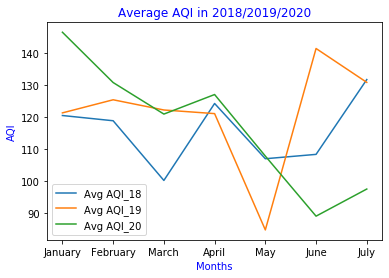

In [79]:
guido_summary_df.plot(y=["Avg AQI_18","Avg AQI_19","Avg AQI_20"])
plt.title("Average AQI in 2018/2019/2020", color="blue")
plt.xlabel("Months",color="blue")
plt.ylabel("AQI",color="blue")
plt.xticks(np.arange(7),("January","February","March","April","May","June","July"))
plt.show()

## Heat Map

In [63]:
import seaborn as sns

Text(0.5, 1, 'AQI Correlation Heatmap')

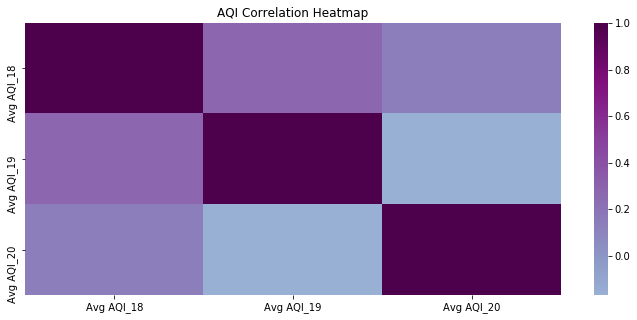

In [68]:
fig, ax = plt.subplots(figsize=(12,5))
sns.heatmap(guido_summary_df[["Avg AQI_18","Avg AQI_19","Avg AQI_20"]].corr(),center=0, cmap= "BuPu")
ax.set_title("AQI Correlation Heatmap")

[Text(0.5, 0, 'Avg AQI_18'),
 Text(1.5, 0, 'Avg AQI_19'),
 Text(2.5, 0, 'Avg AQI_20')]

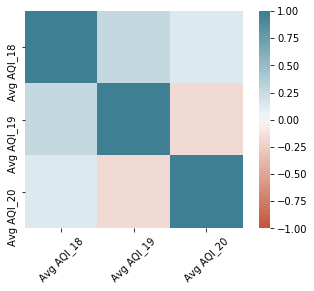

In [78]:
corr = guido_summary_df[["Avg AQI_18","Avg AQI_19","Avg AQI_20"]].corr()
ax = sns.heatmap(corr,vmin=-1,vmax=1, center=0, cmap=sns.diverging_palette(20, 220,n=200),square=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='center')
#compare for death of covid